Cuaderno correspondiente a las predicciones 5, 6, 7, 8, 9 y 10.



In [ ]:
#Comentar las siguientes líneas para ejecutar el siguiente script fuera de GoogleColab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3'

/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3


## Preprocesamiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Manipulación básica de los datos

In [ ]:
rd = pd.read_csv("train.csv", na_values='')
rd_test = pd.read_csv("test.csv", na_values='')

In [ ]:
rd

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,4815.0,Maruti Swift VDI,E,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3
4815,NaN,Porsche Panamera Diesel 250hp,H,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,NaN,5
4816,4817.0,Hyundai Creta 1.6 CRDi SX Option,C,2017.0,40158.0,Diesel,Manual,First,19.67 kmpl,NaN,126.2 bhp,5.0,NaN,4
4817,4818.0,Hyundai Xcent 1.2 VTVT S,E,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,7.85,3


In [ ]:
d = rd.copy()
d_test = rd_test.copy()

In [ ]:
d['Descuento'].count()

659

Vamos a suponer que, si no aparece un descuento, es porque este vale 0:

In [ ]:
def zero_discount(disc):
  if pd.isna(disc):
    return 0.0
  else:
    return disc

In [ ]:
d['Descuento'] = d['Descuento'].map(zero_discount)
d_test['Descuento'] = d_test['Descuento'].map(zero_discount)

In [ ]:
#del d['Descuento']
del d['id']

#del d_test['Descuento']
test_ids = d_test['id']
del d_test['id']

In [ ]:
d['Ciudad'].nunique()

11

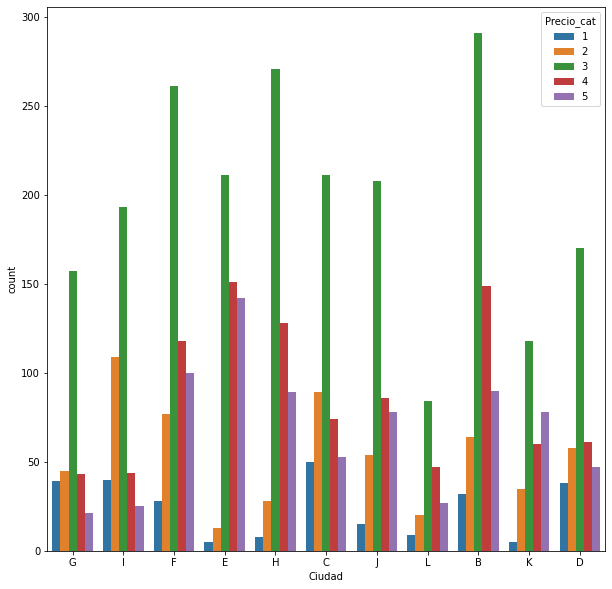

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=d, x='Ciudad', hue='Precio_cat')

In [ ]:
#del d['Ciudad']
#del d_test['Ciudad']  

In [ ]:
#d = d.dropna()

In [ ]:
d.count()

Nombre          4747
Ciudad          4747
Año             4747
Kilometros      4747
Combustible     4747
Tipo_marchas    4747
Mano            4747
Consumo         4746
Motor_CC        4718
Potencia        4644
Asientos        4713
Descuento       4819
Precio_cat      4819
dtype: int64

In [ ]:
d

,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,0.00,3
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,0.00,3
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,0.00,3
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,0.00,3
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,Maruti Swift VDI,E,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,0.00,3
4815,Porsche Panamera Diesel 250hp,H,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,0.00,5
4816,Hyundai Creta 1.6 CRDi SX Option,C,2017.0,40158.0,Diesel,Manual,First,19.67 kmpl,NaN,126.2 bhp,5.0,0.00,4
4817,Hyundai Xcent 1.2 VTVT S,E,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,7.85,3


In [ ]:
def remove_units(s, n_chars):
  if pd.isna(s):
    return s
  else:
    return float(s[0:-n_chars])

def remove_kmpl(s):
  if pd.isna(s):
    return s
  else:
    return remove_units(s, 5)

def remove_cc(s):
  if pd.isna(s):
    return s
  else:
    return remove_units(s, 3)

def remove_bhp(s):
  if pd.isna(s):
    return s
  else:
    return remove_units(s, 4)

In [ ]:
d['Consumo'] = d['Consumo'].map(remove_kmpl)
d['Motor_CC'] = d['Motor_CC'].map(remove_cc)
d['Potencia'] = d['Potencia'].map(remove_bhp)
d_test['Consumo'] = d_test['Consumo'].map(remove_kmpl)
d_test['Motor_CC'] = d_test['Motor_CC'].map(remove_cc)
d_test['Potencia'] = d_test['Potencia'].map(remove_bhp)

In [ ]:
d['Nombre'].nunique()

1654

No merece la pena tener en cuenta los nombres de los modelos.Podemos tener en cuenta las marcas:

In [ ]:
def brand_from_name(s):
  if pd.isna(s):
    return s
  else:
    return s.split(' ', 1)[0].capitalize()

In [ ]:
d['Nombre'] = d['Nombre'].map(brand_from_name)
d = d.rename(columns={'Nombre':'Marca'})

d_test['Nombre'] = d_test['Nombre'].map(brand_from_name)

Vamos a hacer un imputado de los datos perdidos:

In [ ]:
from sklearn.impute import SimpleImputer
si_cont = SimpleImputer(strategy='median')
si_cat = SimpleImputer(strategy='most_frequent')
d.loc[:, ['Marca', 'Ciudad', 'Combustible', 'Tipo_marchas', 'Mano']] = si_cat.fit_transform(d.loc[:,['Marca', 'Ciudad', 'Combustible', 'Tipo_marchas', 'Mano']])
d.loc[:, ['Año', 'Kilometros', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos']] = si_cont.fit_transform(d.loc[:,['Año', 'Kilometros', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos']])

In [ ]:
d

,Marca,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,Maruti,G,2012.0,83000.0,Diesel,Manual,First,23.40,1248.0,74.00,5.0,0.00,3
1,Maruti,I,2016.0,4800.0,Petrol,Manual,First,20.51,998.0,67.04,5.0,0.00,3
2,Mahindra,F,2016.0,26000.0,Diesel,Manual,First,25.32,1198.0,77.00,6.0,0.00,3
3,Hyundai,E,2013.0,56127.0,Petrol,Manual,First,18.50,1197.0,80.00,5.0,0.00,3
4,Honda,H,2017.0,41981.0,Petrol,Manual,First,18.70,1199.0,88.70,5.0,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,Maruti,E,2014.0,83274.0,Diesel,Manual,First,22.90,1248.0,74.00,5.0,0.00,3
4815,Porsche,H,2014.0,60033.0,Diesel,Automatic,First,18.18,2967.0,250.00,4.0,0.00,5
4816,Hyundai,C,2017.0,40158.0,Diesel,Manual,First,19.67,1496.0,126.20,5.0,0.00,4
4817,Hyundai,E,2015.0,65743.0,Petrol,Manual,First,20.14,1197.0,81.86,5.0,7.85,3


### Resampling

Vemos como de desbalanceados están los datos:

In [ ]:
from collections import Counter

In [ ]:
print(Counter(rd['Precio_cat']))
print(Counter(d['Precio_cat']))

Counter({3: 2211, 4: 978, 5: 759, 2: 602, 1: 269})
Counter({3: 2211, 4: 978, 5: 759, 2: 602, 1: 269})


LA SIGUIENTE CLASE GESTIONA EL PREPROCESAMIENTO DE CADA CONJUNTO DE ENTRENAMIENTO/PRUEBA (el motivo es poder restringir el resampleo al conjunto de entrenamiento para evitar sesgos en validación)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTENC, SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek
categorical_features = (0,1,4,5,6)

class Preprocessor():
  def __init__(self, categorical_features):
    self.categorical_features = categorical_features
    self.scaler = MinMaxScaler()
    self.scaler_oh = MinMaxScaler()
    self.le = [ LabelEncoder() for _ in categorical_features ]
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
    self.ohe = ColumnTransformer(transformers=[('cat', categorical_transformer, self.categorical_features)])

  def oversample(self, X, y):
    smote_nc = SMOTENC(categorical_features=self.categorical_features, random_state=0)
    X_res, y_res = smote_nc.fit_resample(X, y)
    return X_res, y_res

  def oversample_numeric(self, X, y):
    smote = BorderlineSMOTE(random_state=0)
    X_res, y_res = smote.fit_resample(X, y)
    #undsamp = EditedNearestNeighbours(random_state=0)
    #X_res, y_res = undsamp.fit_resample(X_res, y_res)
    return X_res, y_res

  #Aplica oversampling, codifica y escala los datos
  def preproc_train(self, X, y, one_hot=False):
    if not one_hot:
      for i, f in enumerate(self.categorical_features):
        self.le[i].fit( np.hstack((d.to_numpy()[:,f],d_test.to_numpy()[:,f])) )   #<------- AQUÍ PONGO LA UNIÓN DEL X DE TRAIN Y EL DE TEST, PARA QUE APRENDA A CODIFICAR LAS DOS
        X[:,f] = self.le[i].transform(X[:,f])
      X = self.scaler.fit_transform(X)
      #tl = TomekLinks()
      #X, y = tl.fit_resample(X, y)
      return X, y
    else:  
      self.ohe.fit( np.vstack((d.loc[:, d.columns != 'Precio_cat'].to_numpy(), d_test.to_numpy())) )
      X_oh = self.ohe.transform( X ).toarray()
      X_oh = np.hstack( (X_oh,np.delete(X,self.categorical_features,axis=1)) )
      X_oh = self.scaler_oh.fit_transform(X_oh)
      return X_oh, y

  #Se aplica sobre el conjunto test antes de la predicción. No hace resampling.
  def preproc_test(self, X_test, one_hot=False):
    if not one_hot:
      for i, f in enumerate(self.categorical_features):
        X_test[:,f] = self.le[i].transform(X_test[:,f])
      X_test = self.scaler.transform(X_test)
      return X_test
    else:
      X_test_oh = self.ohe.transform( X_test ).toarray()
      X_test = np.hstack( (X_test_oh,np.delete(X_test,self.categorical_features,axis=1)) )
      X_test = self.scaler_oh.fit_transform(X_test)
      return X_test

In [ ]:
X = d.loc[:, d.columns != 'Precio_cat'].to_numpy()
y = d['Precio_cat'].to_numpy()

Creamos los splits para la validación cruzada y les aplicamos el resampling:

In [ ]:
##ESTO ES PARA OVERSAMPLEAR CON SMOTENC Y LUEGO CODIFICAR
#from sklearn.model_selection import KFold
#n_splits = 5
#kf = KFold(n_splits, shuffle=True, random_state=0)
#X_train, X_train_oh, X_test, X_test_oh, y_train, y_train_oh, y_test = [],[],[],[],[],[],[]
#preprocessor = [ Preprocessor(categorical_features) for _ in range(n_splits) ]
#preprocessor_oh = [ Preprocessor(categorical_features) for _ in range(n_splits) ]
#for i, (train_idx, test_idx) in enumerate(kf.split(X)):
#    x_tr, x_te = np.copy(X[train_idx]), np.copy(X[test_idx])
#    y_tr, y_te = np.copy(y[train_idx]), np.copy(y[test_idx])
#
#    x_resampled, y_resampled = preprocessor_oh[i].oversample(x_tr, y_tr)
#
#    x_tr, y_tr = preprocessor[i].preproc_train( np.copy(x_resampled), np.copy(y_resampled) )
#    x_tr_oh, y_tr_oh = preprocessor_oh[i].preproc_train( np.copy(x_resampled), np.copy(y_resampled), one_hot=True)
#    x_te_oh = preprocessor_oh[i].preproc_test(np.copy(x_te), one_hot=True)
#    x_te = preprocessor[i].preproc_test(np.copy(x_te))    #ESTO TIENE QUE IR AQUÍ. SI LO PONGO ANTES LO PASO MODIFICADO A x_te_oh
#
#    X_train.append(x_tr)
#    X_train_oh.append(x_tr_oh)
#    X_test.append(x_te)
#    X_test_oh.append(x_te_oh)
#    y_train.append(y_tr)
#    y_train_oh.append(y_tr_oh)
#    y_test.append(y_te)

In [ ]:
##ESTO ES PARA CODIFICAR Y LUEGO OVERSAMPLEAR CON SMOTE
from sklearn.model_selection import KFold
n_splits = 5
kf = KFold(n_splits, shuffle=True, random_state=0)
X_train, X_train_oh, X_test, X_test_oh, y_train, y_train_oh, y_test = [],[],[],[],[],[],[]
preprocessor = [ Preprocessor(categorical_features) for _ in range(n_splits) ]
preprocessor_oh = [ Preprocessor(categorical_features) for _ in range(n_splits) ]
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    x_tr, x_te = np.copy(X[train_idx]), np.copy(X[test_idx])
    y_tr, y_te = np.copy(y[train_idx]), np.copy(y[test_idx])

    x_resampled, y_resampled = np.copy(x_tr), np.copy(y_tr)   #para evitarme cambiar nombres xDD

    x_tr, y_tr = preprocessor[i].preproc_train( np.copy(x_resampled), np.copy(y_resampled) )
    x_tr_oh, y_tr_oh = preprocessor_oh[i].preproc_train( np.copy(x_resampled), np.copy(y_resampled), one_hot=True)
    x_te_oh = preprocessor_oh[i].preproc_test(np.copy(x_te), one_hot=True)
    x_te = preprocessor[i].preproc_test(np.copy(x_te))    #ESTO TIENE QUE IR AQUÍ. SI LO PONGO ANTES LO PASO MODIFICADO A x_te_oh

    x_tr, y_tr = preprocessor[i].oversample_numeric(x_tr, y_tr)
    x_tr_oh, y_tr_oh = preprocessor[i].oversample_numeric(x_tr_oh, y_tr_oh)

    X_train.append(x_tr)
    X_train_oh.append(x_tr_oh)
    X_test.append(x_te)
    X_test_oh.append(x_te_oh)
    y_train.append(y_tr)
    y_train_oh.append(y_tr_oh)
    y_test.append(y_te)

## XGBoost

YA SÍ QUE SÍ PROBAMOS CON EL PRIMER MODELO

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_gradientBoosting(X_train, y_train, X_test, y_test, n_estim=500, max_depth=5, lr=0.1, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=0.8, colsample_bytree=1, booster='gbtree'):
  mean_acc = 0.0
  for x_tr, x_te, y_tr, y_te in zip(X_train, X_test, y_train, y_test):
    gbClassifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective='multi:softmax', booster=booster, n_estimators=n_estim, 
                                     max_depth=max_depth, learning_rate=lr, gamma=gamma, min_child_weight=min_child_weight, 
                                     max_delta_step=max_delta_step, subsample=subsample, colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                     base_score=0.5, sampling_method='gradient_based', grow_policy='lossguide')
    gbClassifier.fit(x_tr, y_tr)
    y_predict = gbClassifier.predict(x_te)
    mean_acc += accuracy_score(y_te, y_predict)
  mean_acc /= n_splits

  return mean_acc

In [ ]:
##GRID SEARCH PARA EL XGBOOST
best_acc = 0.0
for depth in (3,4,5,6,7):
  for lr in (0.05,0.1,0.15,0.2):
    for gamma in (0,0.5,1):
      for subsample in (0.5,0.7,0.8):
        for col_sample in (0.5,0.7,0.8,1):
          acc = train_test_gradientBoosting(X_train, y_train, X_test, y_test, n_estim=300, max_depth=depth, 
                                            subsample=subsample, lr=lr, colsample_bytree=col_sample, 
                                            gamma=gamma)
          if acc > best_acc:
            best_acc = acc
            print( "Mejor precisión encontrada para parámetros ",(depth,lr,gamma,subsample,col_sample) )
            print( "Precisión:", acc )

In [ ]:
train_test_gradientBoosting(X_train, y_train, X_test, y_test, max_depth=4, lr=0.1, gamma=0, subsample=0.7, colsample_bytree=0.7)

0.8364785443138878

## Redes Neuronales

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.utils as np_utils
from sklearn.model_selection import train_test_split

In [ ]:
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy

def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()

In [ ]:
def modelNN(n1, alfa, n2, beta, n3, gamma, n4, input_shape):
  initializer = keras.initializers.GlorotUniform()
  model = keras.Sequential()
  model.add(layers.Dense(n1, activation='relu', kernel_initializer=initializer,
                         input_dim=input_shape)
                        )
  model.add(layers.Dropout(alfa))
  if n2 > 0:
    model.add(layers.Dense(n2, activation='relu', kernel_initializer=initializer,
                         ))
    model.add(layers.Dropout(beta))
  if n3 > 0:
    model.add(layers.Dense(n3, activation='relu', kernel_initializer=initializer,
                         ))
    model.add(layers.Dropout(gamma))
  model.add(layers.Dense(n4, activation='softmax', kernel_initializer=initializer,
                         ))
  return model

In [ ]:
def train_test_MLP(n1, alfa, n2, beta, n3, gamma, n4=5, lr=0.0001, beta_1=0.9, 
                   beta_2=0.99, batch_size=10, epochs=50, 
                   fold_idx=0, plot_hist=True):
  y_truth = np_utils.to_categorical(y_train_oh[fold_idx])[:,1:].astype(int)  #Uso [:,1:] porque to_categorical genera categorías empezando en 0 (así que genera 6, en vez de 5)
  y_truth_test = np_utils.to_categorical(y_test[fold_idx])[:,1:].astype(int)

  MLP = modelNN(n1, alfa, n2, beta, n3, gamma, n4, X_train_oh[fold_idx].shape[1])
  MLP.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer=keras.optimizers.Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2), 
                metrics=['accuracy'])
  hist = MLP.fit(X_train_oh[fold_idx], y_truth, 
                  batch_size=batch_size, epochs=epochs, 
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                  validation_data=(X_test_oh[fold_idx],y_truth_test))
  if plot_hist:
    mostrarEvolucion(hist)
  y_predict = MLP.predict(X_test_oh[fold_idx])
  acc = calcularAccuracy(y_truth_test, y_predict)

  return acc

In [ ]:
#n1, alfa = 378, 0.3
#n2, beta = 256, 0.3
#n3, gamma = 0, 0.3
n1, alfa = 512, 0.3
n2, beta = 378, 0.3
n3, gamma = 16, 0.1

train_test_MLP(n1, alfa, n2, beta, n3, gamma, batch_size=10, lr=0.00001)

In [ ]:
def modelCNN(nfilt1, nfilt2, n1, alfa, n2, beta, n3, gamma, n4, input_shape):
  initializer = keras.initializers.HeNormal()
  model = keras.Sequential()
  #Capas convolucionales
  model.add(layers.Conv1D(nfilt1, kernel_size=3, strides=1, padding='same', 
                          batch_input_shape=input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling1D())

  model.add(layers.Conv1D(nfilt2, kernel_size=3, strides=1, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling1D())

  model.add(layers.Conv1D(nfilt2, kernel_size=3, strides=1, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling1D())

  #Capas FC y salida
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(n1, activation='relu', kernel_initializer=initializer))
  model.add(layers.Dropout(alfa))
  if n2 > 0:
    model.add(layers.Dense(n2, activation='relu', kernel_initializer=initializer))
    model.add(layers.Dropout(beta))
  if n3 > 0:
    model.add(layers.Dense(n3, activation='relu', kernel_initializer=initializer))
    model.add(layers.Dropout(gamma))
  model.add(layers.Dense(n4, activation='softmax', kernel_initializer=initializer))
  return model

In [ ]:
def train_test_CNN(nfilt1, nfilt2, n1, alfa, n2, beta, n3, gamma, n4=5, lr=0.0001, beta_1=0.9, 
                   beta_2=0.99, batch_size=10, epochs=50, 
                   fold_idx=0, plot_hist=True):
  x_tr = X_train[fold_idx]    #Puede ponerse X_train_oh en su lugar
  x_te = X_test[fold_idx]
  y_truth = np_utils.to_categorical(y_train[fold_idx])[:,1:].astype(int)  #Uso [:,1:] porque to_categorical genera categorías empezando en 0 (así que genera 6, en vez de 5)
  y_truth_test = np_utils.to_categorical(y_test[fold_idx])[:,1:].astype(int)

  CNN = modelCNN( nfilt1, nfilt2, n1, alfa, n2, beta, n3, gamma, n4, input_shape=(None,x_tr.shape[1],1) )
  CNN.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer=keras.optimizers.Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2), 
                metrics=['accuracy'])
  hist = CNN.fit(np.expand_dims(x_tr,axis=2), y_truth,    #Le añadimos a X una tercera dimensión para que funcionen las capas Conv1D
                  batch_size=batch_size, epochs=epochs, 
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                  validation_data=(np.expand_dims(x_te,axis=2),y_truth_test))
  if plot_hist:
    mostrarEvolucion(hist)
  y_predict = CNN.predict(np.expand_dims(x_te,axis=2))
  acc = calcularAccuracy(y_truth_test, y_predict)

  return acc

In [ ]:
nfilt1 = 160
nfilt2 = 96 
n1, alfa = 378, 0.3
n2, beta = 128, 0.3
n3, gamma = 26, 0.3

train_test_CNN(nfilt1, nfilt2, n1, alfa, n2, beta, n3, gamma, batch_size=2, lr=0.0001)

## RandomForest (MEH~~, XGBOOST ES MEJOR)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_randomForest(X_train, y_train, X_test, y_test, n_estim=500, depth=5):
  mean_acc = 0.0
  for x_tr, x_te, y_tr, y_te in zip(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=n_estim, max_depth=depth)
    rf.fit(x_tr, y_tr)
    y_predict = rf.predict(x_te)
    mean_acc += accuracy_score(y_te, y_predict)
  mean_acc /= n_splits

  return mean_acc

In [ ]:
train_test_randomForest(X_train, y_train, X_test, y_test, n_estim=500, depth=15)

0.8130315447490769

## Redes Neuronales con Scikit-Learn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_MLPSK(X_train, y_train, X_test, y_test, n1, n2, n3, alpha):
  fold_idx = np.random.randint(0,len(X_train))
  x_tr, y_tr = X_train[fold_idx], y_train[fold_idx]
  x_te, y_te = X_test[fold_idx], y_test[fold_idx]

  mlp_class = MLPClassifier(hidden_layer_sizes=(n1,n2,n3), alpha=alpha)
  mlp_class.fit(x_tr, y_tr)
  y_predict = mlp_class.predict(x_te)
  return accuracy_score(y_te, y_predict)

In [ ]:
best_acc = 0.0
for n1 in (500,450,400,350,300,250,200):
  for n2 in (400,350,300,250,200,150,100):
    for n3 in (200,150,100,50):
      for alfa in (0.001,0.01,0.05,0.1,0.15,0.2):
        acc = train_test_MLPSK(X_train, y_train, X_test, y_test, n1, n2, n3, alfa)
        if acc > best_acc:
          best_acc = acc
          print("Mejor precisión obtenida para los parámetros ", (n1,n2,n3,alfa))
          print("Precisión: ",acc)

In [ ]:
train_test_MLPSK(X_train, y_train, X_test, y_test, 500, 150, 150, 0.01)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7528556593977155

## SVM

In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_SVM(X_train, y_train, X_test, y_test, C, degree):
  fold_idx = np.random.randint(0,len(X_train))
  x_tr, y_tr = X_train[fold_idx], y_train[fold_idx]
  x_te, y_te = X_test[fold_idx], y_test[fold_idx]

  svm = SVC(C=C, kernel='poly', degree=degree, decision_function_shape='ovr')
  svm.fit(x_tr, y_tr)
  y_predict = svm.predict(x_te)
  return accuracy_score(y_te, y_predict)

In [ ]:
train_test_SVM(X_train, y_train, X_test, y_test, 1.5, 9)

0.7528556593977155

## Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_RegLog(X_train, y_train, X_test, y_test):
  fold_idx = np.random.randint(0,len(X_train))
  x_tr, y_tr = X_train[fold_idx], y_train[fold_idx]
  x_te, y_te = X_test[fold_idx], y_test[fold_idx]

  #rl = LogisticRegression(solver='lbfgs', multi_class='ovr', penalty='none', C=1.0, max_iter=1000)
  rl = LogisticRegression(max_iter=1000)
  rl.fit(x_tr, y_tr)
  y_predict = rl.predict(x_te)
  return accuracy_score(y_te, y_predict)

In [ ]:
train_test_RegLog(X_train, y_train, X_test, y_test)

0.6607883817427386

## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def train_test_stacking(X_train, y_train, X_test, y_test):
  mean_acc = 0.0
  for x_tr, x_te, y_tr, y_te in zip(X_train, X_test, y_train, y_test):
    estimators = [
                  ( 'xgb1', xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective='multi:softmax', n_estimators=500, 
                                        max_depth=4, learning_rate=0.1, gamma=0, min_child_weight=1, 
                                        max_delta_step=0, subsample=0.7, colsample_bytree=0.7, 
                                        colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                        base_score=0.5, sampling_method='gradient_based', grow_policy='lossguide') ),
                  ( 'rf', RandomForestClassifier(n_estimators=500, max_depth=15) ),
                  ( 'mlp', MLPClassifier(hidden_layer_sizes=(500,150,150), alpha=0.01) ),
                  ( 'svm', SVC(C=1.5, kernel='poly', degree=9, decision_function_shape='ovr') )
                ]
    final_estimator = GradientBoostingClassifier(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=0)
    clf = StackingClassifier( estimators=estimators, final_estimator=final_estimator )    
    clf.fit(x_tr, y_tr)
    y_predict = clf.predict(x_te)
    mean_acc += accuracy_score(y_te, y_predict)
  mean_acc /= n_splits

  return mean_acc

In [ ]:
train_test_stacking(X_train, y_train, X_test, y_test)

0.8341966020777051

## Entrenamiento final y predicción de test

REENTRENAMOS PARA TODO EL DATASET

In [ ]:
##ESTO ERA CUANDO OVERSAMPLEABA ANTES DE ENCODEAR
#preprocessor_test = Preprocessor(categorical_features)
#
#x_resampled, y_resampled = preprocessor_oh[i].oversample(X, y)
#x_tr, y_tr = preprocessor_test.preproc_train( np.copy(x_resampled), np.copy(y_resampled) )

preprocessor_test = Preprocessor(categorical_features)

x_tr, y_tr = preprocessor_test.preproc_train( np.copy(X), np.copy(y) )
x_tr, y_tr = preprocessor_test.oversample_numeric(x_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
#gbClassifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_estimators=1500, max_depth=4, lr=0.1, gamma=0, subsample=0.7, colsample_bytree=0.7, objective='multi:softmax')
#gbClassifier.fit(x_tr, y_tr)

estimators = [
              ( 'xgb1', xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective='multi:softmax', n_estimators=1000, 
                                    max_depth=4, learning_rate=0.1, gamma=0, min_child_weight=1, 
                                    max_delta_step=0, subsample=0.7, colsample_bytree=0.7, 
                                    colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                    base_score=0.5, sampling_method='gradient_based', grow_policy='lossguide') ),
              #( 'rf', RandomForestClassifier(n_estimators=500, max_depth=15) ),
              ( 'mlp', MLPClassifier(hidden_layer_sizes=(500,150,150), alpha=0.01) )
              #( 'svm', SVC(C=1.5, kernel='poly', degree=10, decision_function_shape='ovr') )
            ]
final_estimator = GradientBoostingClassifier(n_estimators=40, subsample=0.5, min_samples_leaf=25, max_features=1)
stack = StackingClassifier( estimators=estimators, final_estimator=final_estimator )    
stack.fit(x_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


StackingClassifier(cv=None,
                   estimators=[('xgb1',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7, gamma=0,
                                              gpu_id=0, grow_policy='lossguide',
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=4,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=1,
                                              nthread=None,
                                              objective='multi:softmax',
                                              random_stat...
                                                              max_leaf

PREDECIMOS

In [ ]:
x_te = preprocessor_test.preproc_test(np.copy(d_test.to_numpy()))

In [ ]:
y_predict = stack.predict(x_te)

In [ ]:
result = pd.DataFrame({'id':test_ids, 'Precio_cat':y_predict})

In [ ]:
result

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,1
1155,5975,3
1156,5976,4
1157,5977,5


In [ ]:
#result.to_csv('resultados_10.csv', index=False)